In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

In [49]:
df = pd.read_csv('MBP.csv')

df.head(10)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
5,"POCO M4 5G (Power Black, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
6,"POCO C55 (Power Black, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
7,"POCO C55 (Forest Green, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
8,"POCO C55 (Cool Blue, 128 GB)",4.1,"13,647",6 GB RAM,128 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹9,249",2023-06-17
9,"POCO M4 5G (Yellow, 128 GB)",4.2,"40,525",6 GB RAM,128 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹13,999",2023-06-17


In [50]:
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping'],
      dtype='object')

In [51]:
df.duplicated().sum()

69

In [52]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [53]:
df.isnull().sum()

,0
Phone Name,0
Rating ?/5,0
Number of Ratings,0
RAM,0
ROM/Storage,162
Back/Rare Camera,8
Front Camera,381
Battery,9
Processor,49
Price in INR,0


In [54]:
df[df.isnull().any(axis=1)]

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
148,"realme narzo 50i Prime (Mint Green, 32 GB)",4.2,127,3 GB RAM,32 GB ROM,8MP Rear Camera,NaN,5000 mAh,Unisoc Tiger T612 (12 nm) Processor,"₹7,076",2023-06-17
159,"realme Narzo N55 (Prime Blue, 128 GB)",4.3,359,6 GB RAM,128 GB ROM,64MP Rear Camera,NaN,5000 mAh,1 Year Domestic Warranty for Phone and 6 Month...,"₹13,399",2023-06-17
169,"realme Narzo N55 (Prime Black, 128 GB)",4.3,359,6 GB RAM,128 GB ROM,64MP Rear Camera,NaN,5000 mAh,1 Year Domestic Warranty for Phone and 6 Month...,"₹13,589",2023-06-17
198,"realme NARZO 50A PRIME (FLASH BLUE, 64 GB)",4.1,"1,238",4 GB RAM,64 GB ROM,50MP Rear Camera,NaN,5000 mAh,1 YEAR ON MOBILE AND 6 MONTHS FOR ACCESORIES,"₹11,300",2023-06-17
202,"realme Narzo 50A Prime (Flash Blue, 128 GB)",4.1,"1,238",4 GB RAM,128 GB ROM,50MP Rear Camera,NaN,5000 mAh,12 Months Brand Warranty,"₹11,979",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1681,Alcatel ONE TOUCH 506,3.0,5,2 MB ROM,NaN,2MP Rear Camera,NaN,650 mAh,1 Year for Mobile & 6 Months for Accessories,"₹2,490",2023-06-17
1683,"Alcatel One Touch Glory 2T (White, 100 MB)",4.1,21,256 MB RAM,100 MB ROM,2MP Rear Camera,NaN,1400 mAh,1 Year for Mobile & 6 Months for Accessories,"₹4,350",2023-06-17
1684,Alcatel OT808,4.0,22,80 MB ROM,Expandable Upto 8 GB,2MP Rear Camera,NaN,850 mAh,1 Year for Mobile & 6 Months for Accessories,"₹6,450",2023-06-17
1685,Alcatel ONE TOUCH 813D,4.5,22,50 MB ROM,Expandable Upto 16 GB,2MP Rear Camera,NaN,1000 mAh,1 Year for Mobile & 6 Months for Accessories,"₹4,990",2023-06-17


In [55]:
df = df.dropna()
df.isnull().sum()

,0
Phone Name,0
Rating ?/5,0
Number of Ratings,0
RAM,0
ROM/Storage,0
Back/Rare Camera,0
Front Camera,0
Battery,0
Processor,0
Price in INR,0


In [56]:
df.rename(columns={'Phone Name': 'Phone','Rating ?/5':'Rate' ,'ROM/Storage': 'ROM', 'Back/Rare Camera': 'Back Camera'}, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone              1252 non-null   object 
 1   Rate               1252 non-null   float64
 2   Number of Ratings  1252 non-null   object 
 3   RAM                1252 non-null   object 
 4   ROM                1252 non-null   object 
 5   Back Camera        1252 non-null   object 
 6   Front Camera       1252 non-null   object 
 7   Battery            1252 non-null   object 
 8   Processor          1252 non-null   object 
 9   Price in INR       1252 non-null   object 
 10  Date of Scraping   1252 non-null   object 
dtypes: float64(1), object(10)
memory usage: 117.4+ KB


In [58]:
drop_col = ['Date of Scraping']
df.drop(columns=drop_col, inplace=True)

In [59]:
df['Phone'].unique()

array(['POCO C50 (Royal Blue, 32 GB)', 'POCO M4 5G (Cool Blue, 64 GB)',
       'POCO C51 (Royal Blue, 64 GB)', ...,
       'Infinix Note 7 (Aether Black, 64 GB)',
       'Infinix Zero 8i (Silver Diamond, 128 GB)',
       'Infinix S5 (Quetzal Cyan, 64 GB)'], dtype=object)

In [60]:
df['Phone'] = df['Phone'].str.split().str[0]
df['Phone']

,Phone
0,POCO
1,POCO
2,POCO
3,POCO
4,POCO
...,...
1831,Infinix
1832,Infinix
1833,Infinix
1834,Infinix


In [61]:
df.dtypes

,0
Phone,object
Rate,float64
Number of Ratings,object
RAM,object
ROM,object
Back Camera,object
Front Camera,object
Battery,object
Processor,object
Price in INR,object


In [62]:
df['Number of Ratings']

,Number of Ratings
0,"33,561"
1,"77,128"
2,"15,175"
3,"22,621"
4,"15,175"
...,...
1831,"25,582"
1832,"25,582"
1833,"25,582"
1834,"7,117"


In [63]:
df['Number of Ratings'] = df['Number of Ratings'].str.replace(',', '').astype(int)

In [64]:
df['RAM'].value_counts()

,count
RAM,
4 GB RAM,341
8 GB RAM,338
6 GB RAM,265
3 GB RAM,153
2 GB RAM,90
12 GB RAM,46
1 GB RAM,12
512 MB RAM,4
8 MB RAM,1


In [65]:
ram_to_remove = ["1 GB RAM", "512 MB RAM", "8 MB RAM", "16 MB RAM", "1.5 GB RAM"]

In [66]:
df = df[~df['RAM'].isin(ram_to_remove)]

In [67]:
df['RAM'].value_counts()

,count
RAM,
4 GB RAM,341
8 GB RAM,338
6 GB RAM,265
3 GB RAM,153
2 GB RAM,90
12 GB RAM,46


In [68]:
df['RAM'] = df['RAM'].str.split().str[0]
df['RAM'] = df['RAM'].astype(int)

In [69]:
df

,Phone,Rate,Number of Ratings,RAM,ROM,Back Camera,Front Camera,Battery,Processor,Price in INR
0,POCO,4.2,33561,2,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,POCO,4.2,77128,4,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
2,POCO,4.3,15175,4,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
3,POCO,4.2,22621,4,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
4,POCO,4.3,15175,4,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1832,Infinix,4.3,25582,4,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1833,Infinix,4.3,25582,4,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1834,Infinix,4.2,7117,8,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999"


In [70]:
df['ROM'].value_counts()

,count
ROM,
128 GB ROM,541
64 GB ROM,355
32 GB ROM,179
256 GB ROM,126
16 GB ROM,26
512 GB ROM,4
8 GB ROM,2


In [71]:
rom_to_remove = ["8 GB ROM"]

In [72]:
df = df[~df['ROM'].isin(rom_to_remove)]
df['ROM'] = df['ROM'].str.split().str[0]
df['ROM'] = df['ROM'].astype(int)

In [73]:
df['ROM'].value_counts()

,count
ROM,
128,541
64,355
32,179
256,126
16,26
512,4


In [74]:
df

,Phone,Rate,Number of Ratings,RAM,ROM,Back Camera,Front Camera,Battery,Processor,Price in INR
0,POCO,4.2,33561,2,32,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,POCO,4.2,77128,4,64,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
2,POCO,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
3,POCO,4.2,22621,4,64,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
4,POCO,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1832,Infinix,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1833,Infinix,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1834,Infinix,4.2,7117,8,128,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999"


In [75]:
df['Back Camera'].value_counts()

,count
Back Camera,
13MP + 2MP,77
64MP + 8MP + 2MP,76
50MP + 2MP + 2MP,76
50MP + 2MP,69
13MP Rear Camera,55
...,...
16MP + 5MP + 8MP,1
48MP + 2MP + 16MP + 8MP,1
50MP + 50MP + 12MP,1


In [76]:
df['Size Cam Blkg'] = df['Back Camera'].str.split().str[0].str.replace('MP', '').str.replace('Mp', '')
df['Size Cam Blkg'] = df['Size Cam Blkg'].str.replace('12.2','12').str.replace('12.3','12').str.replace('0.3','1').astype

In [77]:
def hitung_cam(string_cam):
    if "Dual" in string_cam:
        return 2
    else:
        hitung_plus = string_cam.count('+')
        return hitung_plus + 1

In [78]:
df['Back Camera Total'] = df['Back Camera'].apply(lambda x: hitung_cam(x))

In [79]:
drpro = ['Back Camera']
df.drop(columns=drpro, inplace=True)

In [80]:
df

,Phone,Rate,Number of Ratings,RAM,ROM,Front Camera,Battery,Processor,Price in INR,Size Cam Blkg,Back Camera Total
0,POCO,4.2,33561,2,32,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",<bound method NDFrame.astype of 0 8\n1 ...,2
1,POCO,4.2,77128,4,64,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",<bound method NDFrame.astype of 0 8\n1 ...,2
2,POCO,4.3,15175,4,64,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",<bound method NDFrame.astype of 0 8\n1 ...,2
3,POCO,4.2,22621,4,64,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",<bound method NDFrame.astype of 0 8\n1 ...,2
4,POCO,4.3,15175,4,64,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",<bound method NDFrame.astype of 0 8\n1 ...,2
...,...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",<bound method NDFrame.astype of 0 8\n1 ...,4
1832,Infinix,4.3,25582,4,64,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",<bound method NDFrame.astype of 0 8\n1 ...,4
1833,Infinix,4.3,25582,4,64,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",<bound method NDFrame.astype of 0 8\n1 ...,4
1834,Infinix,4.2,7117,8,128,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",<bound method NDFrame.astype of 0 8\n1 ...,4


In [81]:
df['Front Camera'].value_counts()

,count
Front Camera,
16MP Front Camera,327
8MP Front Camera,298
5MP Front Camera,248
32MP Front Camera,97
13MP Front Camera,69
20MP Front Camera,56
20MP + 2MP Dual Front Camera,14
50MP Front Camera,14
12MP Front Camera,13


In [82]:
df['Front Camera Size'] = df['Front Camera'].str.split().str[0].str.replace('MP', '').str.replace('Mp', '')
df['Front Camera Size'] = df['Front Camera Size'].str.replace('10.8', '11').str.replace('0.3', '1').str.replace('1.6', '2').str.replace('1.3', '1')
df['Front Camera Size'].fillna(0, inplace=True)

df['Front Camera Size'] = df['Front Camera Size'].astype(int)

def hitung_camera(string_cam):
    if "Dual" in string_cam:
        return 2
    else:
        return 1

In [83]:
df['Front Camera Size'] = df['Front Camera'].apply(lambda x: hitung_camera(x))

In [84]:
drpro = ['Front Camera']
df.drop(columns=drpro, inplace=True)

In [85]:
df

,Phone,Rate,Number of Ratings,RAM,ROM,Battery,Processor,Price in INR,Size Cam Blkg,Back Camera Total,Front Camera Size
0,POCO,4.2,33561,2,32,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",<bound method NDFrame.astype of 0 8\n1 ...,2,1
1,POCO,4.2,77128,4,64,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",<bound method NDFrame.astype of 0 8\n1 ...,2,1
2,POCO,4.3,15175,4,64,5000 mAh,Helio G36 Processor,"₹6,999",<bound method NDFrame.astype of 0 8\n1 ...,2,1
3,POCO,4.2,22621,4,64,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",<bound method NDFrame.astype of 0 8\n1 ...,2,1
4,POCO,4.3,15175,4,64,5000 mAh,Helio G36 Processor,"₹6,999",<bound method NDFrame.astype of 0 8\n1 ...,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",<bound method NDFrame.astype of 0 8\n1 ...,4,1
1832,Infinix,4.3,25582,4,64,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",<bound method NDFrame.astype of 0 8\n1 ...,4,1
1833,Infinix,4.3,25582,4,64,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",<bound method NDFrame.astype of 0 8\n1 ...,4,1
1834,Infinix,4.2,7117,8,128,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",<bound method NDFrame.astype of 0 8\n1 ...,4,2


In [86]:
df['Battery'].unique()

array(['5000 mAh', '4500 mAh', '4000 mAh', '5160 mAh', '6000 mAh',
       '5065 mAh', '4200 mAh', '4300 mAh', '4230 mAh', '3300 mAh',
       '3900 mAh', '4700 mAh', '3700 mAh', '3000 mAh', '7000 mAh',
       '4800 mAh', '4015 mAh', '4025 mAh', '3400 mAh', '4350 mAh',
       '4310 mAh', '3200 mAh', '4020 mAh', '4410 mAh', '4270 mAh',
       '4926 mAh', '2915 mAh', '4600 mAh', '4030 mAh', '4050 mAh',
       '4810 mAh', '4830 mAh', '4870 mAh', '4450 mAh', '3315 mAh',
       '3225 mAh', '3260 mAh', '4250 mAh', '4520 mAh', '3080 mAh',
       '3120 mAh', '4100 mAh', '4850 mAh', '3030 mAh', '3010 mAh',
       '4820 mAh', '4780 mAh', '5300 mAh', '5050 mAh', '3060 mAh',
       '4950 mAh', '4400 mAh', '4610 mAh', '4115 mAh', '3800 mAh',
       '4085 mAh', '3340 mAh', '3450 mAh', '2200 mAh', '2610 mAh',
       '3760 mAh', '3500 mAh', '5200 mAh'], dtype=object)

In [87]:
df['Battery'] = df['Battery'].str.replace('mAh', '').astype(float)

In [88]:
def pilah_pro(pro):
    if 5000 <= pro < 5500:
        return '5000'
    elif 5500 <= pro < 6000:
        return '5500'
    elif 4000 <= pro < 4500:
        return '4000'
    elif 4500 <= pro < 5000:
        return '4500'
    elif 2000 <= pro < 2500:
        return '2000'
    elif 2500 <= pro < 3000:
        return '2500'
    elif 1000 <= pro < 1500:
        return '1000'
    elif 1500 <= pro < 1900:
        return '1500'

In [89]:
df['Battery'] = df['Battery'].apply(pilah_pro)
df['Battery'].fillna(0, inplace=True)
df['Battery'] = df['Battery'].astype(int)

In [90]:
df['Price in INR'] = df['Price in INR'].str.replace('₹', '').str.replace(',', '').astype(float)

In [91]:
df['Processor'].unique()

array(['Mediatek Helio A22 Processor, Upto 2.0 GHz Processor',
       'Mediatek Dimensity 700 Processor', 'Helio G36 Processor',
       'Mediatek Helio G85 Processor', 'Mediatek Helio G99 Processor',
       'Mediatek Helio G96 Processor',
       'Qualcomm Snapdragon 695 Processor',
       'Mediatek Dimensity 810 Processor',
       'Qualcomm Snapdragon 778G Processor',
       'MediaTek Dimensity 700 Processor',
       'Qualcomm Snapdragon 695 5G Processor',
       'Qualcomm Snapdragon 7+ Gen 2 (4nm) Processor',
       'MediaTek Helio G35 Processor',
       'Qualcomm Snapdragon 730G Processor', 'MediaTek G35 Processor',
       'Qualcomm Snapdragon 845 Processor',
       'Qualcomm Snapdragon 870 Processor',
       'Mediatek Helio G35 Processor', 'MediaTek Helio G80 Processor',
       'Qualcomm Snapdragon 720G Processor',
       'Qualcomm Snapdragon 860 Processor',
       'Qualcomm Snapdragon 662 Processor',
       'Qualcomm Snapdragon 732G Processor',
       'MediaTek Dimensity 1200 Proce

In [92]:
df['Upd_Processor'] = df['Processor'].str.split().str[0]
def pilah_pro(pro):
    if pro == 'Qualcomm' or pro == 'Qualcomm®' or pro == 'Snapdragon' or pro == '2nd-gen':
        return 'Snapdragon'
    elif pro == 'Mediatek' or pro == 'MediaTek' or pro == 'Meditek' or pro == 'Helio':
        return 'Mediatek'
    elif pro == 'Octa-core(EXYNOS)' or pro == 'Exynos':
        return 'Exynos'
    elif pro == '1':
        return 'IOS'
    elif pro == 'HUAWEI' or pro =='Kirin' :
        return 'Huawei'
    elif pro == 'Google':
        return 'Google'
    else :
        return 'Other'

In [93]:
df['Upd_Processor'] = df['Upd_Processor'].apply(pilah_pro)
drpro = ['Processor']
df.drop(columns=drpro, inplace=True)
df['Upd_Processor'].value_counts()

,count
Upd_Processor,
Mediatek,494
Snapdragon,455
Other,197
Exynos,49
IOS,21
Google,11
Huawei,4


<Axes: xlabel='Rate'>

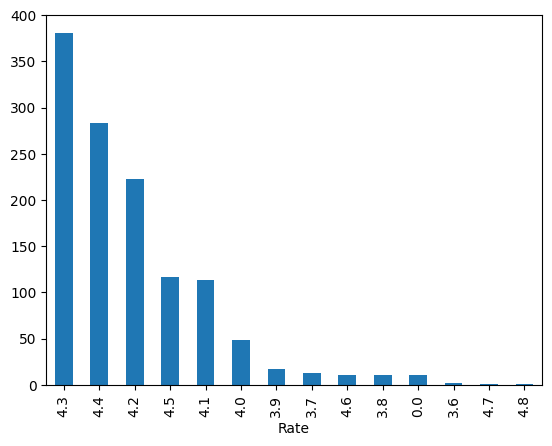

In [94]:
df['Rate'].value_counts().plot(kind='bar')

<Axes: xlabel='ROM', ylabel='Density'>

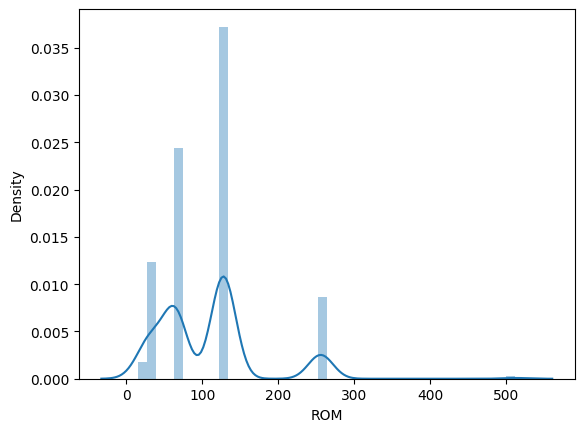

In [96]:
sns.distplot(df['ROM'])

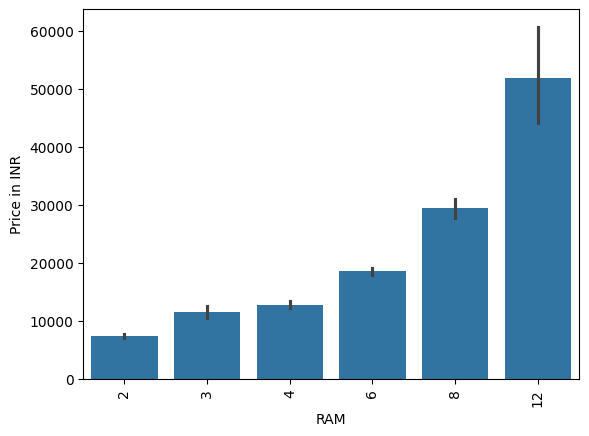

In [97]:
sns.barplot(x=df['RAM'], y=df['Price in INR'])
plt.xticks(rotation='vertical')
plt.show()

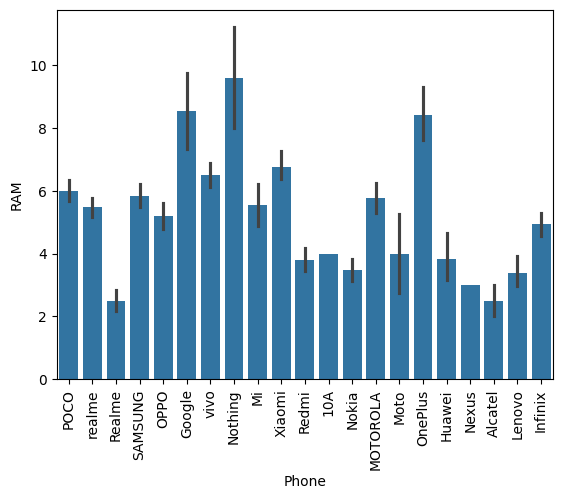

In [98]:
sns.barplot(x=df['Phone'], y=df['RAM'])
plt.xticks(rotation='vertical')
plt.show()

In [99]:
df.dtypes

,0
Phone,object
Rate,float64
Number of Ratings,int64
RAM,int64
ROM,int64
Battery,int64
Price in INR,float64
Size Cam Blkg,object
Back Camera Total,int64
Front Camera Size,int64


In [100]:
df_encoded = pd.get_dummies(df, columns=['Phone', 'Upd_Processor'], drop_first=True)
df_numerik = df_encoded.select_dtypes(include=['float64', 'int32', 'int64'])

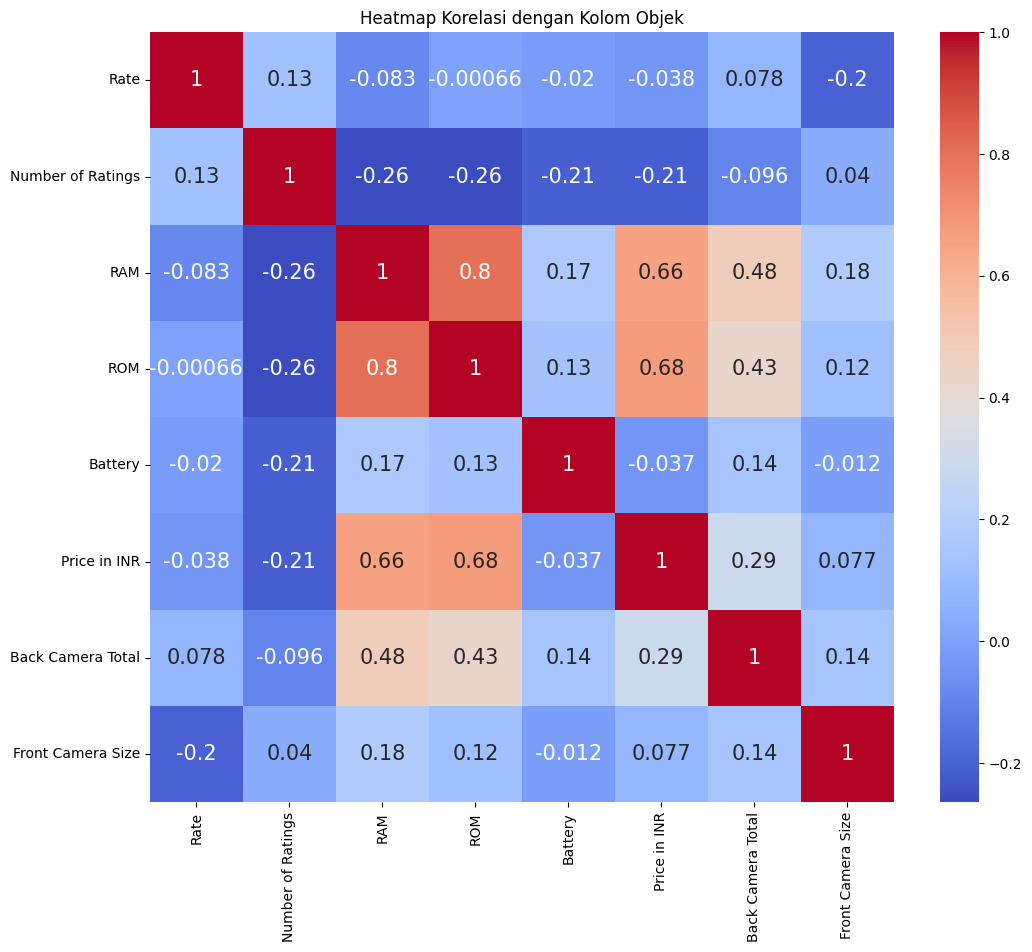

In [101]:
plt.figure(figsize=(12,10))
sns.heatmap(df_numerik.corr(), annot=True, annot_kws={'size': 15}, cmap='coolwarm')
plt.title('Heatmap Korelasi dengan Kolom Objek')
plt.show()

In [102]:
df['Price in INR'] = np.log(df['Price in INR'])
df

,Phone,Rate,Number of Ratings,RAM,ROM,Battery,Price in INR,Size Cam Blkg,Back Camera Total,Front Camera Size,Upd_Processor
0,POCO,4.2,33561,2,32,5000,8.639234,<bound method NDFrame.astype of 0 8\n1 ...,2,1,Mediatek
1,POCO,4.2,77128,4,64,5000,9.392579,<bound method NDFrame.astype of 0 8\n1 ...,2,1,Mediatek
2,POCO,4.3,15175,4,64,5000,8.853523,<bound method NDFrame.astype of 0 8\n1 ...,2,1,Mediatek
3,POCO,4.2,22621,4,64,5000,8.955319,<bound method NDFrame.astype of 0 8\n1 ...,2,1,Mediatek
4,POCO,4.3,15175,4,64,5000,8.853523,<bound method NDFrame.astype of 0 8\n1 ...,2,1,Mediatek
...,...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,5000,9.615739,<bound method NDFrame.astype of 0 8\n1 ...,4,1,Mediatek
1832,Infinix,4.3,25582,4,64,5000,9.615739,<bound method NDFrame.astype of 0 8\n1 ...,4,1,Mediatek
1833,Infinix,4.3,25582,4,64,5000,9.615739,<bound method NDFrame.astype of 0 8\n1 ...,4,1,Mediatek
1834,Infinix,4.2,7117,8,128,4500,9.852142,<bound method NDFrame.astype of 0 8\n1 ...,4,2,Mediatek


In [104]:
df = df.drop(columns=['Number of Ratings', 'Rate'])

In [108]:
df_numerik

,Rate,Number of Ratings,RAM,ROM,Battery,Price in INR,Back Camera Total,Front Camera Size
0,4.2,33561,2,32,5000,5649.0,2,1
1,4.2,77128,4,64,5000,11999.0,2,1
2,4.3,15175,4,64,5000,6999.0,2,1
3,4.2,22621,4,64,5000,7749.0,2,1
4,4.3,15175,4,64,5000,6999.0,2,1
...,...,...,...,...,...,...,...,...
1831,4.3,25582,4,64,5000,14999.0,4,1
1832,4.3,25582,4,64,5000,14999.0,4,1
1833,4.3,25582,4,64,5000,14999.0,4,1
1834,4.2,7117,8,128,4500,18999.0,4,2


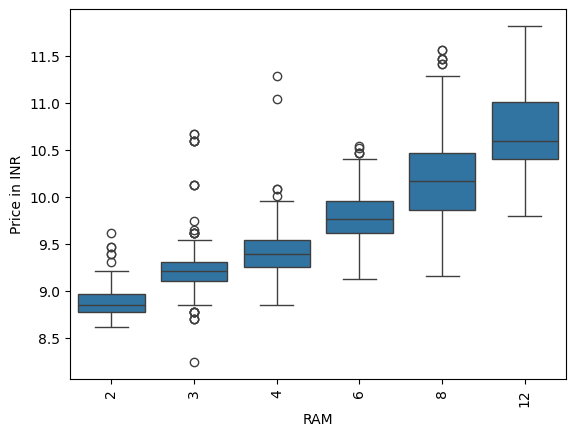

In [112]:
sns.boxplot(x=df['RAM'], y=df['Price in INR'])
plt.xticks(rotation='vertical')
plt.show()
